In [1]:
%reload_ext autoreload
%autoreload 2
import shapely
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
import dtcc_wrangler
import dtcc_wrangler.geometry.polygons
from dtcc_wrangler.geometry.polygons import merge_list_of_polygons, find_merge_candidates, polygon_merger
from dtcc_wrangler.geometry.polygons import clean_merge_candidates

from scipy.sparse import lil_matrix
from scipy.sparse.csgraph import connected_components
import numpy as np
from collections import defaultdict
from itertools import combinations, groupby

In [2]:
wkt = "MultiPolygon (((102209.0030993853288237 6213469.8669445738196373, 102206.84589938499266282 6213460.99334457237273455, 102195.05479938496137038 6213463.85754457302391529, 102196.49189938454946969 6213469.77324457280337811, 102194.80829938438546378 6213470.18284457456320524, 102196.7175993848068174 6213478.03654457163065672, 102209.0689993851701729 6213475.0345445740967989, 102207.87969938530295622 6213470.13964457344263792, 102209.0030993853288237 6213469.8669445738196373)),((102201.94259938455070369 6213478.91834457404911518, 102201.44849938478728291 6213476.88684457261115313, 102196.71659938487573527 6213478.03654457349330187, 102197.22159938467666507 6213480.11734457314014435, 102200.03329938519163989 6213479.44814457185566425, 102200.0176993847853737 6213479.38574457261711359, 102201.94259938455070369 6213478.91834457404911518)),((102199.78479938438977115 6213449.67224457208067179, 102198.78389938487089239 6213445.55084457341581583, 102197.41599938506260514 6213445.88424457237124443, 102196.80259938503149897 6213443.3608445730060339, 102193.33889938466018066 6213444.20204457081854343, 102194.68149938491114881 6213449.72644457314163446, 102195.63989938466693275 6213449.49324457254260778, 102195.9116993848583661 6213450.61254457384347916, 102199.78479938438977115 6213449.67224457208067179)),((102203.45909938460681587 6213459.86234457325190306, 102202.82789938477799296 6213457.23254457302391529, 102199.55949938524281606 6213458.01784457173198462, 102200.17449938459321856 6213460.65134457219392061, 102203.45909938460681587 6213459.86234457325190306)),((102203.21509938454255462 6213450.78424457367509604, 102204.33849938446655869 6213450.51154457125812769, 102202.18219938452239148 6213441.63894457370042801, 102196.70799938442360144 6213442.96964457165449858, 102197.41599938506260514 6213445.88424457237124443, 102198.78389938487089239 6213445.55084457341581583, 102199.78479938438977115 6213449.67224457208067179, 102195.9116993848583661 6213450.61254457384347916, 102195.63989938466693275 6213449.49324457254260778, 102190.14459938489017077 6213450.82844457402825356, 102192.05389938429289032 6213458.68214457202702761, 102204.40529938480176497 6213455.68014457076787949, 102203.21509938454255462 6213450.78424457367509604)),((102196.49189938453491777 6213469.77424457296729088, 102195.08699938499194104 6213463.98824457079172134, 102191.26019938517129049 6213464.91654457338154316, 102190.7421993849275168 6213465.87174457125365734, 102191.92249938490567729 6213470.39424457401037216, 102192.85429938456218224 6213471.02274457365274429, 102194.89289938515867107 6213470.52774457260966301, 102194.8092993845930323 6213470.18284457363188267, 102196.49189938453491777 6213469.77424457296729088)))"
mp = shapely.from_wkt(wkt)
mp
poly_list = [p for p in mp.geoms]

In [3]:
min_area = 15
poly_list

[<POLYGON ((102209.003 6213469.867, 102206.846 6213460.993, 102195.055 621346...>,
 <POLYGON ((102201.943 6213478.918, 102201.448 6213476.887, 102196.717 621347...>,
 <POLYGON ((102199.785 6213449.672, 102198.784 6213445.551, 102197.416 621344...>,
 <POLYGON ((102203.459 6213459.862, 102202.828 6213457.233, 102199.559 621345...>,
 <POLYGON ((102203.215 6213450.784, 102204.338 6213450.512, 102202.182 621344...>,
 <POLYGON ((102196.492 6213469.774, 102195.087 6213463.988, 102191.26 6213464...>]

2023-11-23 15:11:50,114 [dtcc-wrangler] [INFO] Failed to merge polygons. Falling back to merging convex hull


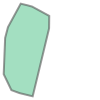

In [110]:
polygon_merger(poly_list, 2, min_area)[0][0]

In [4]:
merge_candidates = find_merge_candidates(poly_list, 2)
print(merge_candidates)

[[0, 1, 2, 3, 4, 5]]


In [10]:
cmc = clean_merge_candidates(poly_list, merge_candidates, 2,  min_area)

In [12]:
poly_candidates = [poly_list[i] for i in cmc[0]]

In [16]:
smc = find_merge_candidates(poly_candidates, 2)

In [25]:
merge_candidates

[[0, 1, 2, 4, 5],
 [0, 1, 4],
 [2, 3],
 [0, 1, 4],
 [2, 3],
 [0, 1, 4],
 [2, 3],
 [0, 1, 4],
 [2, 3]]

In [26]:
[mc for mc in merge_candidates if len(mc) > 0]

[[0, 1, 2, 4, 5],
 [0, 1, 4],
 [2, 3],
 [0, 1, 4],
 [2, 3],
 [0, 1, 4],
 [2, 3],
 [0, 1, 4],
 [2, 3]]